In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("./data/raw_analyst_ratings.csv")

In [2]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
data.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [4]:
data.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [5]:
data.shape

(1407328, 6)

In [6]:
data.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [7]:
data["length_of_headline"]=data["headline"].apply(len)
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,length_of_headline
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [8]:
top_publishers = data['publisher'].value_counts()
top_publishers

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

In [9]:
publishers_by_url = data['url'].value_counts()
publishers_by_url

url
https://www.benzinga.com/news/20/03/15538835/stocks-that-hit-52-week-lows-on-thursday                                            1704
https://www.benzinga.com/news/20/03/15607641/stocks-that-hit-52-week-lows-on-thursday                                             754
https://www.benzinga.com/news/20/02/15441854/stocks-that-hit-52-week-lows-on-friday                                               714
https://www.benzinga.com/news/20/03/15498904/stocks-that-hit-52-week-lows-on-friday                                               624
https://www.benzinga.com/news/20/02/15429529/stocks-that-hit-52-week-lows-on-thursday                                             562
                                                                                                                                 ... 
https://www.benzinga.com/news/15/01/5180386/china-zenix-auto-wins-supply-contract-with-cargotec-to-supply-tubeless-steel-whee       1
https://www.benzinga.com/news/15/01/5117570/china-zenix-au

In [10]:
publishers_data = top_publishers.reset_index()

publishers_data.columns = ['Publisher', 'Count']
publishers_data.head()

,Publisher,Count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380


In [11]:
publisher_count_url=publishers_by_url.reset_index()
publisher_count_url.columns=["Url","Count"]
publisher_count_url.head()

,Url,Count
0,https://www.benzinga.com/news/20/03/15538835/s...,1704
1,https://www.benzinga.com/news/20/03/15607641/s...,754
2,https://www.benzinga.com/news/20/02/15441854/s...,714
3,https://www.benzinga.com/news/20/03/15498904/s...,624
4,https://www.benzinga.com/news/20/02/15429529/s...,562


In [12]:
top_10_url=publisher_count_url.head(10)


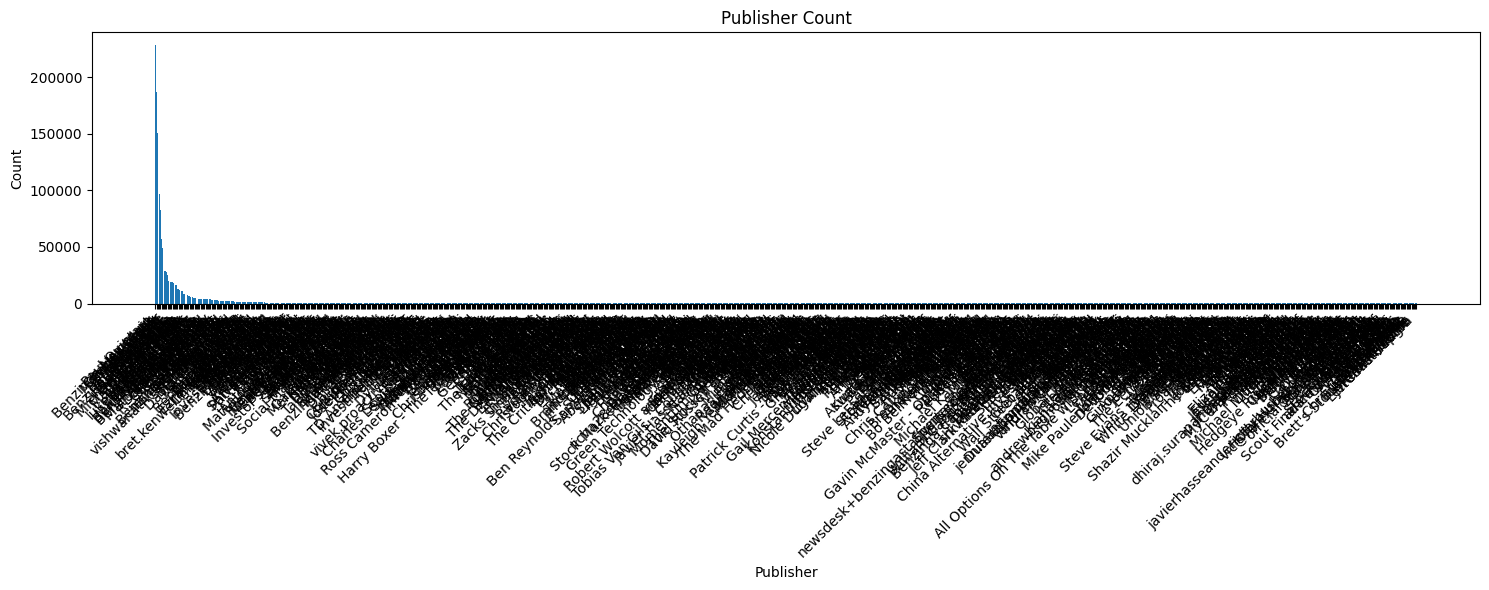

In [13]:
plt.figure(figsize=(15, 6))

plt.bar(publishers_data["Publisher"], publishers_data["Count"])

plt.xlabel("Publisher")
plt.ylabel("Count")
plt.title("Publisher Count")
plt.xticks(rotation=45, ha="right")


plt.tight_layout()  
plt.show()

In [14]:
top_10_publisher=publishers_data.head(10)

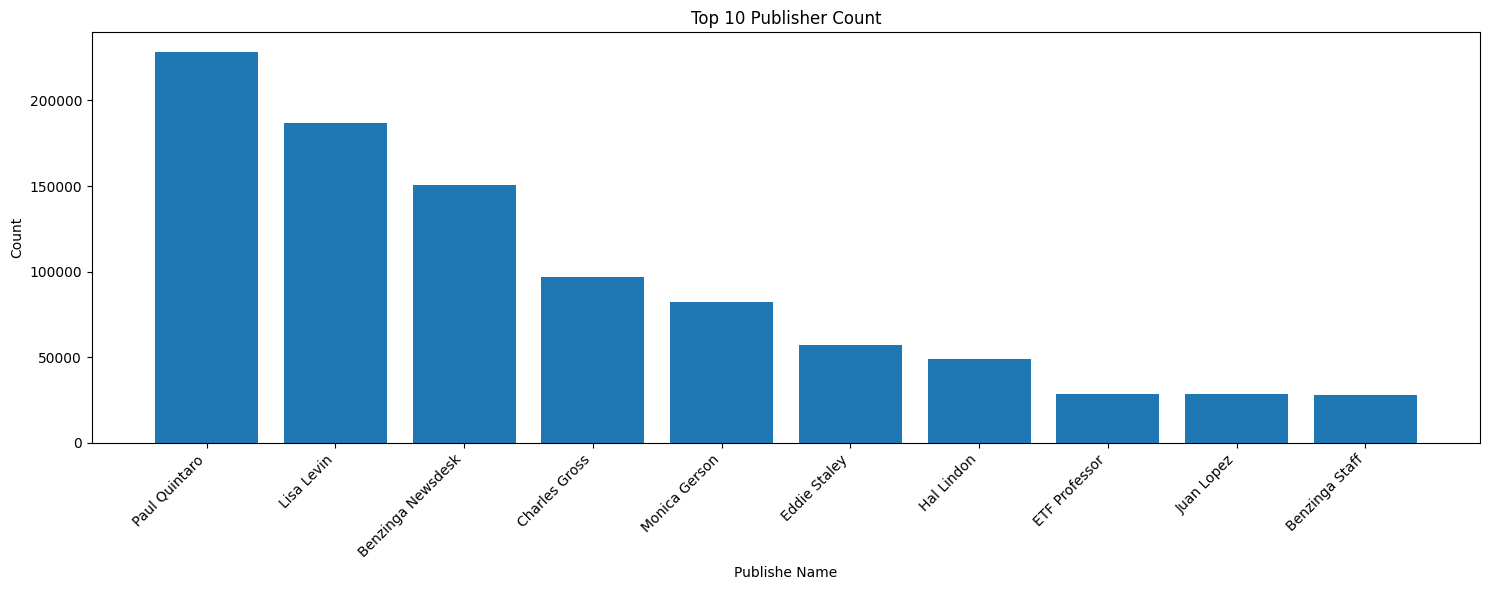

In [15]:
plt.figure(figsize=(15, 6))

plt.bar(top_10_publisher["Publisher"], top_10_publisher["Count"])

plt.xlabel("Publishe Name")
plt.ylabel("Count")
plt.title("Top 10 Publisher Count")
plt.xticks(rotation=45, ha="right")


plt.tight_layout()  
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_10484\3907906072.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


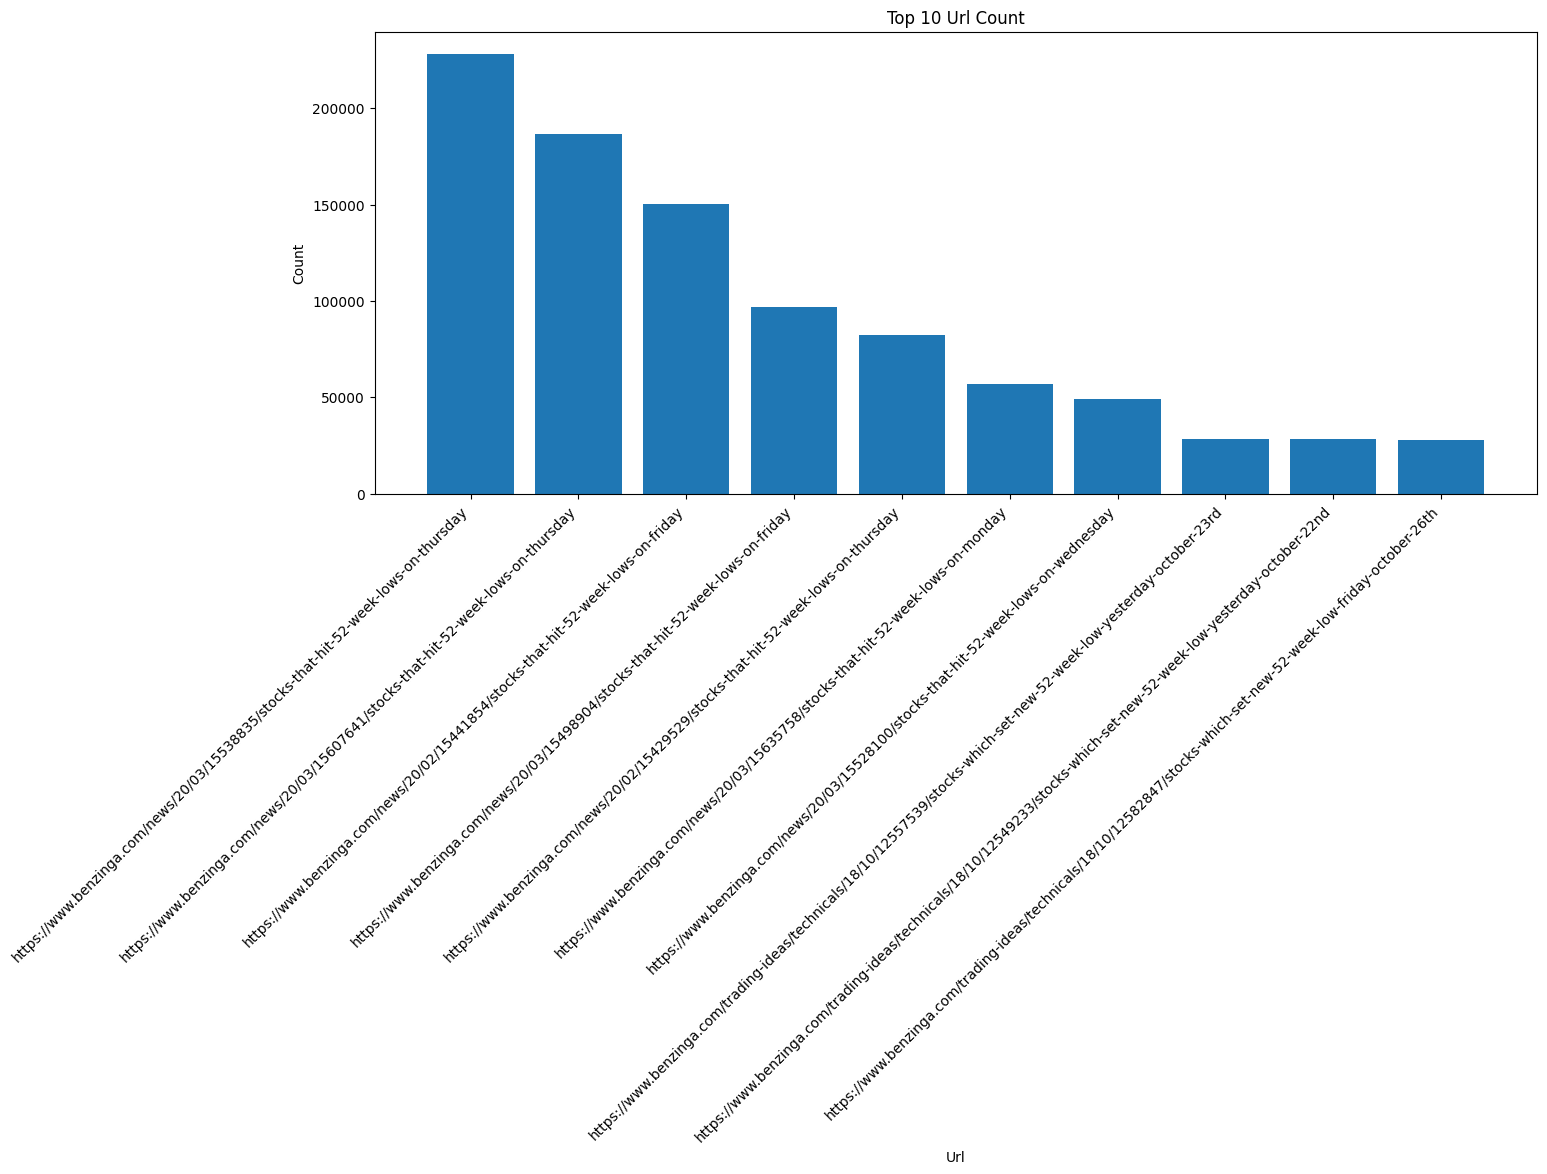

In [16]:
plt.figure(figsize=(15, 6))

plt.bar(top_10_url["Url"], top_10_publisher["Count"])

plt.xlabel("Url")
plt.ylabel("Count")
plt.title("Top 10 Url Count")
plt.xticks(rotation=45, ha="right")


plt.tight_layout()  
plt.show()

In [17]:

data.dtypes

Unnamed: 0             int64
headline              object
url                   object
publisher             object
date                  object
stock                 object
length_of_headline     int64
dtype: object

In [18]:
data["date"]=pd.to_datetime(data["date"],errors='coerce')

In [19]:
data["date_format"]=data["date"].dt.date
data.head()


,Unnamed: 0,headline,url,publisher,date,stock,length_of_headline,date_format
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020-06-05
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020-06-03
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020-05-26
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020-05-22
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020-05-22


In [20]:
publication_date=data.groupby('date_format').size().reset_index(name='count')
publication_date.head()

,date_format,count
0,2011-04-27,1
1,2011-04-28,2
2,2011-04-29,2
3,2011-04-30,1
4,2011-05-01,1


In [21]:
publication_date["date_format"]=pd.to_datetime(publication_date["date_format"],errors="coerce")

In [22]:
publication_date["Year"]=publication_date["date_format"].dt.year
publication_date["Month"]=publication_date["date_format"].dt.month
publication_date["Day"]=publication_date["date_format"].dt.day

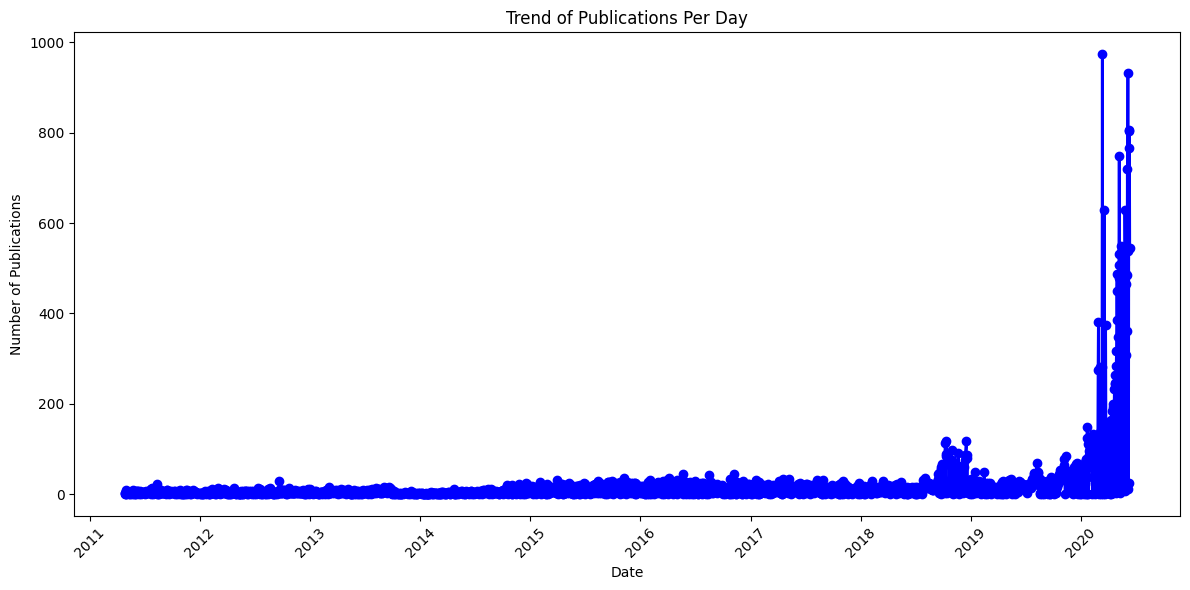

In [23]:
plt.figure(figsize=(12, 6))  
plt.plot(publication_date['date_format'], publication_date['count'], marker='o', color='b', linestyle='-', linewidth=2)


plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.title('Trend of Publications Per Day')


plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

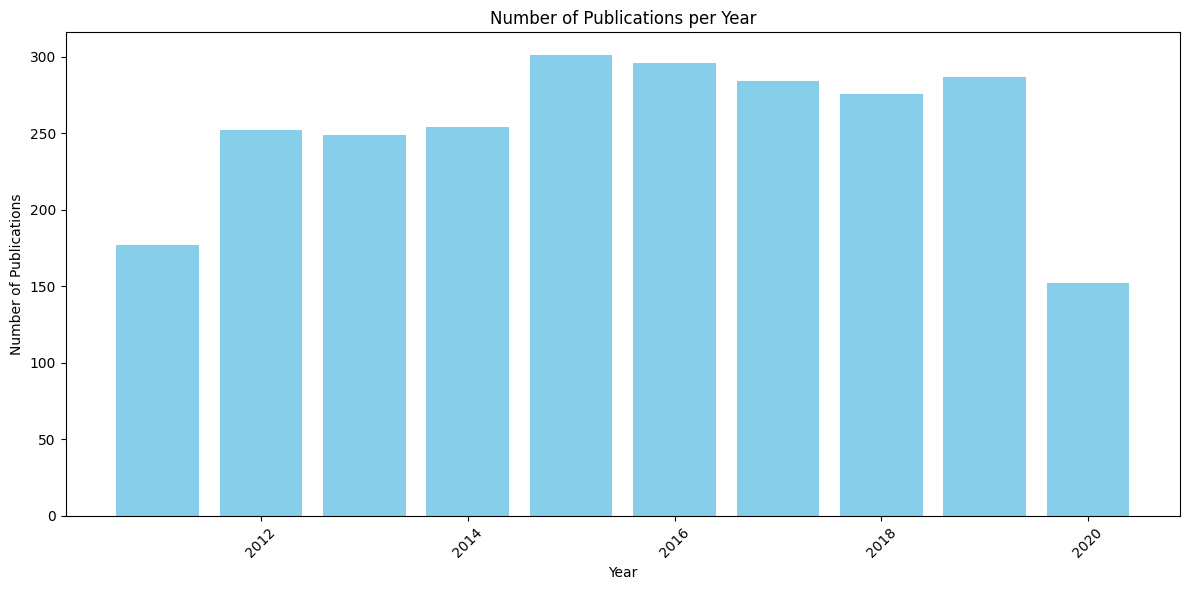

In [24]:
yearly_count = publication_date.groupby('Year').size().reset_index(name='count')

# Plotting Year-wise count
plt.figure(figsize=(12, 6))
plt.bar(yearly_count['Year'], yearly_count['count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Number of Publications per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

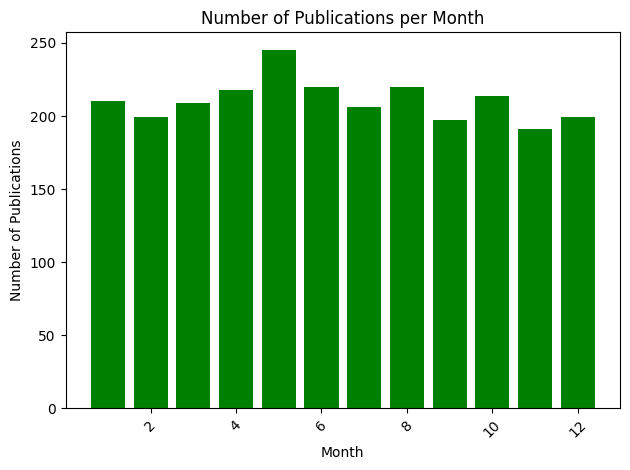

In [25]:
monthly_count = publication_date.groupby('Month').size().reset_index(name='count')
plt.Figure(figsize=(15,6))
plt.bar(monthly_count["Month"],monthly_count["count"],color="green")
plt.xlabel('Month')
plt.ylabel('Number of Publications')
plt.title('Number of Publications per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

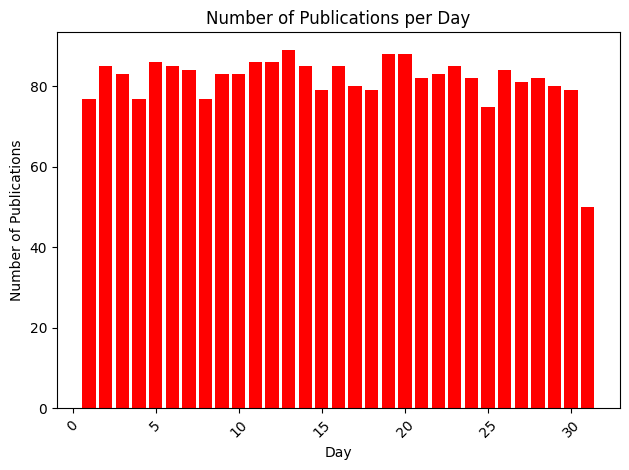

In [26]:
daily_count = publication_date.groupby('Day').size().reset_index(name='count')
plt.Figure(figsize=(15,6))
plt.bar(daily_count["Day"],daily_count["count"],color="red")
plt.xlabel('Day')
plt.ylabel('Number of Publications')
plt.title('Number of Publications per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
publication_date["Hour"]=data["date"].dt.hour

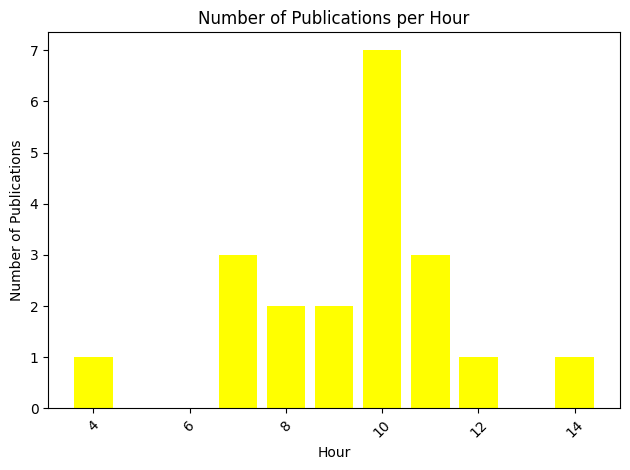

In [29]:
hourly_data=publication_date.groupby("Hour").size().reset_index(name="count")
plt.Figure(figsize=(15,6))
plt.bar(hourly_data["Hour"],hourly_data["count"],color="yellow")
plt.xlabel('Hour')
plt.ylabel('Number of Publications')
plt.title('Number of Publications per Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()